# Import Libraries and load Dataset:-

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# this is Restaurant dataset I have used from Kaggel

In [ ]:
# df = pd.read_csv('Restaurant_reviews.csv')
# df.head()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Example path to a CSV file
file_path = '/content/drive/MyDrive/Restaurant_reviews.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [5]:
df.isnull().sum()

,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Metadata,38
Time,38
Pictures,0
7514,9999


In [ ]:
df.isnull().sum()/df.shape[0]

,0
Restaurant,0.0000
Reviewer,0.0038
Review,0.0045
Rating,0.0038
Metadata,0.0038
Time,0.0038
Pictures,0.0000
7514,0.9999


In [ ]:
df.size,df.shape

(80000, (10000, 8))

In [ ]:
df['Restaurant'].value_counts()

,count
Restaurant,
Beyond Flavours,100
Paradise,100
Flechazo,100
Shah Ghouse Hotel & Restaurant,100
Over The Moon Brew Company,100
...,...
Desi Bytes,100
Hyderabadi Daawat,100
Zega - Sheraton Hyderabad Hotel,100


In [ ]:
df['Rating'].value_counts()

,count
Rating,
5,3832
4,2373
1,1735
3,1193
2,684
4.5,69
3.5,47
2.5,19
1.5,9


In [5]:
new_df = df[~df['Rating'].isin(['Like'])]

In [6]:
new_df['Rating'].value_counts()

,count
Rating,
5,3832
4,2373
1,1735
3,1193
2,684
4.5,69
3.5,47
2.5,19
1.5,9


# Handling null value :-

In [7]:
# Convert 'Rating' column to float
new_df['Rating'] = new_df['Rating'].astype(float)

<ipython-input-7-aca7da665af6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Rating'] = new_df['Rating'].astype(float)


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9999 non-null   object 
 1   Reviewer    9961 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9961 non-null   float64
 4   Metadata    9961 non-null   object 
 5   Time        9961 non-null   object 
 6   Pictures    9999 non-null   int64  
 7   7514        1 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 703.1+ KB


In [9]:
# Replace missing (or all) values with the median
new_df['Rating'] = new_df['Rating'].fillna(new_df['Rating'].median())

<ipython-input-9-9135186077c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Rating'] = new_df['Rating'].fillna(new_df['Rating'].median())


In [10]:
new_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', '7514'],
      dtype='object')

In [10]:
# new_df['Review'] = new_df['Review'].fillna(new_df['Review'].mode())
new_df.dropna(subset=['Review'],inplace=True)  # or 'Text', if your column is named that

<ipython-input-10-db6353bed3c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(subset=['Review'],inplace=True)  # or 'Text', if your column is named that


In [12]:
new_df.isnull().sum()

,0
Restaurant,0
Reviewer,0
Review,0
Rating,0
Metadata,0
Time,0
Pictures,0
7514,9953


<Axes: xlabel='Rating', ylabel='count'>

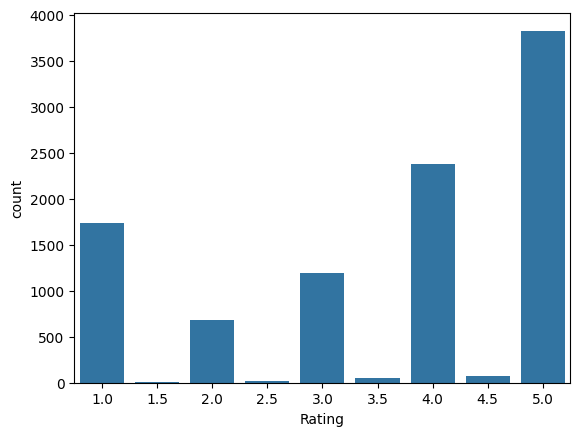

In [ ]:
sns.countplot(x=new_df['Rating'])

<Axes: ylabel='Rating'>

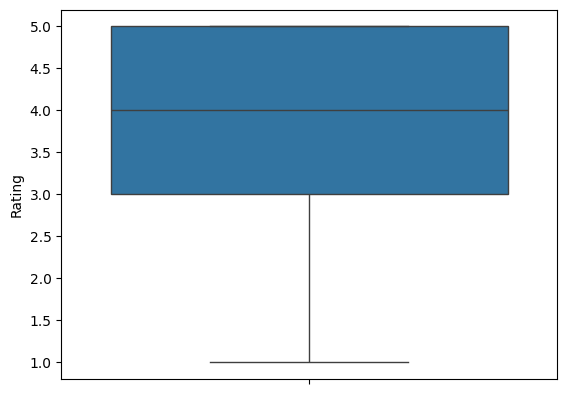

In [ ]:
sns.boxplot(new_df['Rating'])

## Feature Engineering & Feature Selections:-

In [13]:
new_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', '7514'],
      dtype='object')

In [11]:
new_ = new_df.copy()
new_.drop(['Restaurant','Reviewer','Metadata','Time','Pictures','7514'],axis=1,inplace=True)

In [12]:
new_.head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0


In [16]:
new_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  9954 non-null   object 
 1   Rating  9954 non-null   float64
dtypes: float64(1), object(1)
memory usage: 233.3+ KB


In [17]:
new_.isnull().sum()

,0
Review,0
Rating,0


In [ ]:
new_['Review'][0]

'The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.'

In [13]:
# NLP libraries to clean the text data
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from flask import Flask, request, jsonify
import pickle


# RUN python -m nltk.downloader punkt stopwords

#Dockerfile: Make sure your Dockerfile includes all necessary dependencies—nltk, scikit-learn, pandas, imblearn, etc.

#NLTK Downloads: If your preprocess function uses NLTK stopwords and tokenizers, don't forget to download them during the Docker image build:


In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
import spacy

In [16]:
nlp = spacy.load('en_core_web_sm')

In [17]:
token = nlp(new_['Review'][0])
token

The ambience was good, food was quite good . had Saturday lunch , which was cost effective .
Good place for a sate brunch. One can also chill with friends and or parents.
Waiter Soumen Das was really courteous and helpful.

In [ ]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_context',
 '_get_array_attrs',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment'

# Data Cleaning and Preprocessing:-

In [ ]:
# def preprocess(text):
#     if not isinstance(text, str):
#         return ''
#     # Tokenization
#     tokens = nltk.word_tokenize(text)
#     #tokens = tokens.str.replace('[^\w\s]','')
#     # Remove stop words
#     # stop_words = set(nltk.corpus.stopwords.words('english'))
#     tokens = [word for word in tokens if word not in stop_words]
#     # Stemming
#     stemmer = nltk.PorterStemmer()
#     tokens = [stemmer.stem(word) for word in tokens]
#     return ' '.join(tokens)

In [18]:
# Preprocessing function
def preprocess(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [24]:
new_['Review'][0]

'The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.'

In [25]:
preprocess(new_['Review'][0])

'ambienc good food quit good saturday lunch cost effect good place sate brunch one also chill friend parent waiter soumen da realli courteou help'

In [19]:
new_['New_Review'] = new_['Review'].apply(preprocess)

In [ ]:
new_.drop('new_Rating',inplace=True,axis=1)

In [20]:
new_['new_Rating'] = new_['Rating'].apply(lambda x: 1 if x >3 else 0)
#apply( lambda x:'Positive' if x >=4 else ('Negative' if x<2 else 'Neutral' ))

In [21]:
new_.head()

,Review,Rating,New_Review,new_Rating
0,"The ambience was good, food was quite good . h...",5.0,ambienc good food quit good saturday lunch cos...,1
1,Ambience is too good for a pleasant evening. S...,5.0,ambienc good pleasant even servic prompt food ...,1
2,A must try.. great food great ambience. Thnx f...,5.0,must tri great food great ambienc thnx servic ...,1
3,Soumen das and Arun was a great guy. Only beca...,5.0,soumen da arun great guy behavior sincereti go...,1
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,food goodw order kodi drumstick basket mutton ...,1


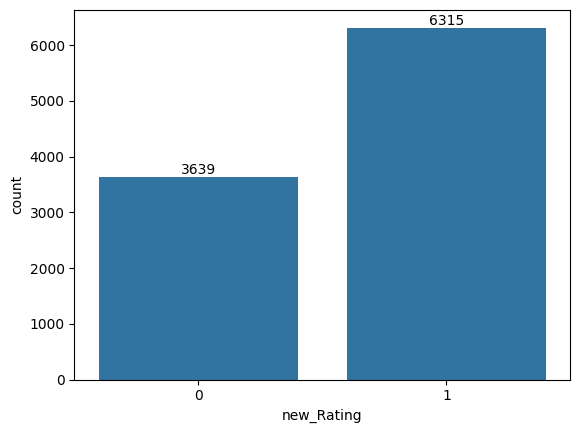

In [ ]:
x = sns.countplot(x=new_['new_Rating'])
for i in x.containers:
    x.bar_label(i)
#sns.countplot(x=new_df['Rating'])

# Hypothesis testing:-

In [28]:
from textblob import TextBlob
from scipy.stats import ttest_ind

In [22]:
# Apply sentiment analysis
new_['polarity'] = new_['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [30]:
new_.head()

,Review,Rating,New_Review,new_Rating,polarity
0,"The ambience was good, food was quite good . h...",5.0,ambienc good food quit good saturday lunch cos...,1,0.660000
1,Ambience is too good for a pleasant evening. S...,5.0,ambienc good pleasant even servic prompt food ...,1,0.606667
2,A must try.. great food great ambience. Thnx f...,5.0,must tri great food great ambienc thnx servic ...,1,0.540000
3,Soumen das and Arun was a great guy. Only beca...,5.0,soumen da arun great guy behavior sincereti go...,1,0.500000
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,food goodw order kodi drumstick basket mutton ...,1,0.577500


In [31]:
new_.describe()

,Rating,new_Rating,polarity
count,9954.000000,9954.000000,9954.000000
mean,3.600261,0.634418,0.250702
std,1.483573,0.481617,0.365045
min,1.000000,0.000000,-1.000000
25%,3.000000,0.000000,0.006062
50%,4.000000,1.000000,0.279167
75%,5.000000,1.000000,0.505804
max,5.000000,1.000000,1.000000


In [32]:
new_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review      9954 non-null   object 
 1   Rating      9954 non-null   float64
 2   New_Review  9954 non-null   object 
 3   new_Rating  9954 non-null   int64  
 4   polarity    9954 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 724.6+ KB


In [ ]:
# new_['Rating'] = new_['Rating'].astype(float)
new_.drop('target',axis=1,inplace=True)

In [23]:
new_['target'] = new_['polarity'].apply(lambda x: 1 if x >=0.3 else 0 )

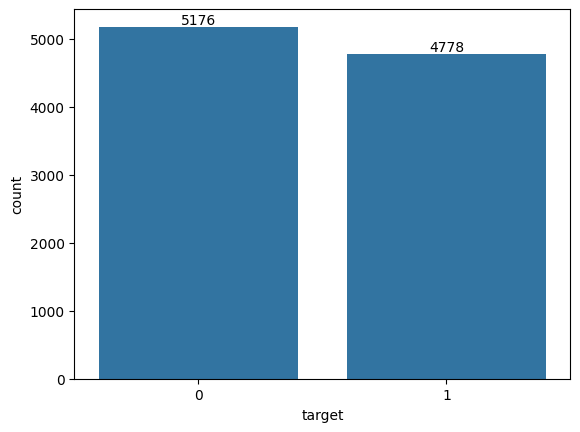

In [34]:
x = sns.countplot(x=new_['target'])
for i in x.containers:
    x.bar_label(i)

In [35]:
new_[new_['Rating']==2]

,Review,Rating,New_Review,new_Rating,polarity,target
75,I have been at this place for dinner a few day...,2.0,place dinner day back ambienc good restaur alm...,0,-0.036538,0
83,Food quality and taste is not good. Super slow...,2.0,food qualiti tast good super slow servic nice ...,0,-0.072778,0
91,I liked the food and ambience but the problem ...,2.0,like food ambienc problem staff respons weve o...,0,0.650000,1
98,Pathetic and horrible experience\nAmbience and...,2.0,pathet horribl experi ambienc hospit 1 food 1 ...,0,-0.492857,0
200,We were 4 people who visited this place on Thu...,2.0,4 peopl visit place thursday nightambi servic ...,0,0.500000,1
...,...,...,...,...,...,...
9888,late,2.0,late,0,-0.300000,0
9889,paratha had some sort of foul smell.,2.0,paratha sort foul smell,0,0.000000,0
9903,Overrated place. It's a disappointment and bel...,2.0,overr place disappoint par per tast panok praw...,0,-0.100000,0
9908,For the first time in my life someone justifie...,2.0,first time life someon justifi burnt noodl tas...,0,0.216667,0


In [36]:
new_[new_['polarity']>=0]
new_[new_['polarity']<=0].shape

(2458, 6)

In [37]:
new_.shape

(9954, 6)

<ipython-input-38-bce6f915c2a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_['polarity'])


<Axes: xlabel='polarity', ylabel='Density'>

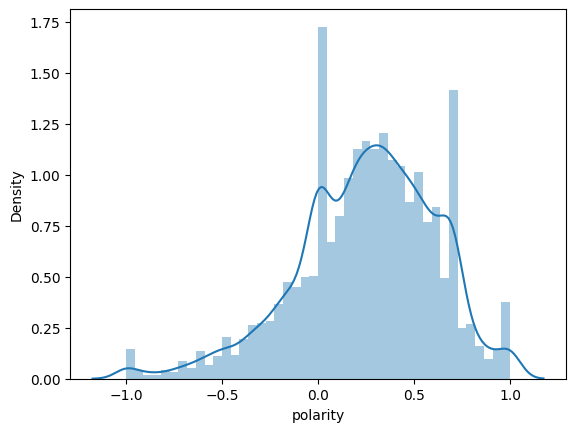

In [38]:
sns.distplot(new_['polarity'])

<Axes: ylabel='polarity'>

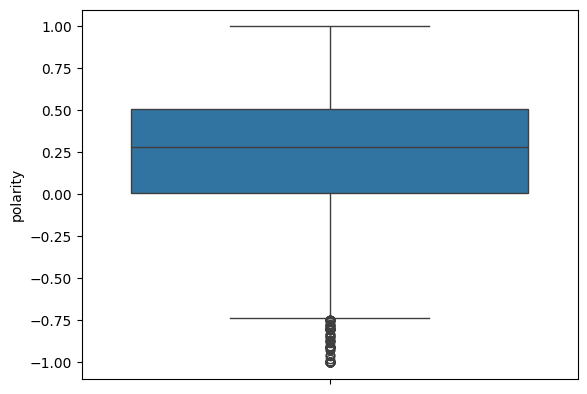

In [ ]:
sns.boxplot(new_['polarity'])

In [24]:
q1,q3 = new_['polarity'].quantile([0.25,0.75])
q1,q3

IQR = q3 - q1

min_= q1 - 1.5 * IQR
max_= q3 + 1.5 * IQR

min_, max_

new_df = new_[(new_['polarity']>=min_)  & (new_['polarity']<=max_)]

new_df

,Review,Rating,New_Review,new_Rating,polarity,target
0,"The ambience was good, food was quite good . h...",5.0,ambienc good food quit good saturday lunch cos...,1,0.660000,1
1,Ambience is too good for a pleasant evening. S...,5.0,ambienc good pleasant even servic prompt food ...,1,0.606667,1
2,A must try.. great food great ambience. Thnx f...,5.0,must tri great food great ambienc thnx servic ...,1,0.540000,1
3,Soumen das and Arun was a great guy. Only beca...,5.0,soumen da arun great guy behavior sincereti go...,1,0.500000,1
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,food goodw order kodi drumstick basket mutton ...,1,0.577500,1
...,...,...,...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0,madhumathi mahajan well start nice courteou se...,0,0.292500,0
9996,This place has never disappointed us.. The foo...,4.5,place never disappoint us food courteou staff ...,1,0.186174,0
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5,bad rate mainli chicken bone found veg food ac...,0,0.124535,0
9998,I personally love and prefer Chinese Food. Had...,4.0,person love prefer chines food coupl time husb...,1,0.470000,1


<Axes: ylabel='polarity'>

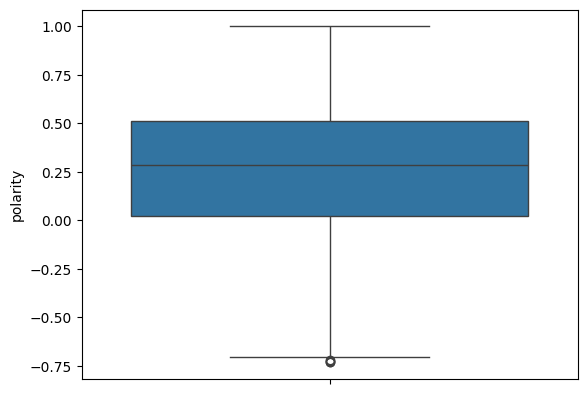

In [25]:
sns.boxplot(new_df['polarity'])

In [26]:
new_df.columns

Index(['Review', 'Rating', 'New_Review', 'new_Rating', 'polarity', 'target'], dtype='object')

In [27]:
new_df[new_df['new_Rating'] == 0]

,Review,Rating,New_Review,new_Rating,polarity,target
14,"We ordered corn cheese balls, manchow soup and...",1.0,order corn chees ball manchow soup paneer shas...,0,-0.500000,0
30,"Short review: Decent breads and starters, bad ...",3.0,short review decent bread starter bad shaam sa...,0,0.066823,0
45,The reason for giving only a 3 star is because...,3.0,reason give 3 star longlong time wait tabl wen...,0,0.090000,0
56,We went for lunch buffet yesterday and took a ...,3.0,went lunch buffet yesterday took chanc see goo...,0,0.106696,0
66,"we went for a team lunch, such a worst restaur...",1.0,went team lunch worst restaur food tasteless s...,0,-0.365000,0
...,...,...,...,...,...,...
9978,The food was just average. Staffs were very ni...,3.0,food averag staff nice serv time also nice tas...,0,0.406000,1
9988,Had a mixed experience... Cant say it is bad c...,3.0,mix experi cant say bad cant say good ok order...,0,0.238889,0
9994,Chinese Pavilion in Banjara HIlls was the firs...,1.5,chines pavilion banjara hill first chines rest...,0,0.235972,0
9995,Madhumathi Mahajan Well to start with nice cou...,3.0,madhumathi mahajan well start nice courteou se...,0,0.292500,0


In [ ]:
from scipy.stats import ttest_ind

group_a = new_df[new_df['new_Rating'] == 1]['polarity']
group_b = new_df[new_df['new_Rating'] == 0]['polarity']

# Apply t-test
t_stat, p_value = ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in sentiment.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: 76.894, P-value: 0.000
Reject the null hypothesis: Significant difference in sentiment.


In [ ]:
new_df['polarity'].value_counts()

,count
polarity,
0.700000,508
0.000000,476
1.000000,167
0.600000,138
0.500000,118
...,...
0.530556,1
0.030556,1
0.211462,1


In [ ]:
from scipy.stats import ttest_ind

group_a = new_df[new_df['target'] == 1]['polarity']
group_b = new_df[new_df['target'] == 0]['polarity']

# Apply t-test
t_stat, p_value = ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in sentiment.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: 132.363, P-value: 0.000
Reject the null hypothesis: Significant difference in sentiment.


In [ ]:
# from transformers import pipeline
# # Define sentiment pipeline with truncation
# sentiment_pipeline = pipeline("sentiment-analysis", truncation=True)

# # Apply pipeline (it processes each row of text)
# sentiment_results = sentiment_pipeline(new_df['Review'].tolist())

# # Append results
# new_df['label'] = [res['label'] for res in sentiment_results]
# new_df['score'] = [res['score'] if res['label'] == 'POSITIVE' else -res['score'] for res in sentiment_results]

In [ ]:
# from scipy.stats import ttest_ind, shapiro, levene
# import numpy as np

# # Split scores by group
# group_a_scores = new_df[new_df['target'] == 1]['score']
# group_b_scores = new_[new_df['target'] == 0]['score']

# # Normality check
# print("Shapiro-Wilk Test for Normality:")
# print(f"Group A: p={shapiro(group_a_scores).pvalue:.3f}")
# print(f"Group B: p={shapiro(group_b_scores).pvalue:.3f}")

# # Levene's Test for equal variances
# print("\nLevene’s Test for Homogeneity of Variances:")
# print(f"p={levene(group_a_scores, group_b_scores).pvalue:.3f}")

# # Welch's t-test (does not assume equal variance)
# t_stat, p_val = ttest_ind(group_a_scores, group_b_scores, equal_var=False)

# print("\nWelch's t-test Result:")
# print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")


## Machine learning Libraries for further processing:-

In [28]:
# For Splitting the dataset
from sklearn.model_selection import train_test_split

#Accuracy measuring library
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score ,precision_score,recall_score ,roc_auc_score

# Vectorization technique TF-IDF or CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# sklearn Pipeline
from sklearn.pipeline import Pipeline

from imblearn.pipeline import Pipeline as ImbPipeline

In [44]:
new_df.head()

,Review,Rating,New_Review,new_Rating,polarity,target
0,"The ambience was good, food was quite good . h...",5.0,ambienc good food quit good saturday lunch cos...,1,0.660000,1
1,Ambience is too good for a pleasant evening. S...,5.0,ambienc good pleasant even servic prompt food ...,1,0.606667,1
2,A must try.. great food great ambience. Thnx f...,5.0,must tri great food great ambienc thnx servic ...,1,0.540000,1
3,Soumen das and Arun was a great guy. Only beca...,5.0,soumen da arun great guy behavior sincereti go...,1,0.500000,1
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,food goodw order kodi drumstick basket mutton ...,1,0.577500,1


# Divided dataset into Independent(X) and Dependent (Y) Features

In [29]:
X = new_df[['New_Review']]
X.head()

,New_Review
0,ambienc good food quit good saturday lunch cos...
1,ambienc good pleasant even servic prompt food ...
2,must tri great food great ambienc thnx servic ...
3,soumen da arun great guy behavior sincereti go...
4,food goodw order kodi drumstick basket mutton ...


In [30]:
y = new_df[['new_Rating']]
y.head()

,new_Rating
0,1
1,1
2,1
3,1
4,1


## Split the data into training and testing sets, stratifying by label

In [226]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [33]:
X_train.shape , y_train.shape

((7856, 1), (7856, 1))

In [32]:
X_test.shape,y_test.shape

((1965, 1), (1965, 1))

In [50]:
new_df['new_Rating'].value_counts()

,count
new_Rating,
1,6312
0,3509


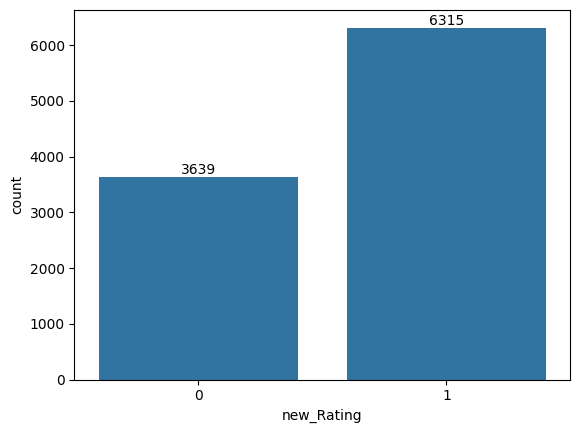

In [ ]:
x = sns.countplot(x=new_['new_Rating'])
for i in x.containers:
    x.bar_label(i)

In [34]:
# Vectorize the text data
#vectorizer = TfidfVectorizer(max_features=1000)
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english') # ngram_range=(1,2)

In [35]:
# X_train_v = vectorizer.fit_transform(X_train)
# X_test_v = vectorizer.transform(X_test)

X_train_v = vectorizer.fit_transform(X_train['New_Review'])
X_test_v = vectorizer.transform(X_test['New_Review'])

In [36]:
# VERY IMPORTANT: Reset y_train index to match X_train_v
# Flatten and reset y_train index
y_train = y_train['new_Rating'].reset_index(drop=True)

In [37]:
# 4. Check shapes before resampling
print("Before resampling:", X_train_v.shape, len(y_train))

Before resampling: (7856, 10000) 7856


# Apply Class Imbalance Handling Techniques --> Sampling ( Over Sampling and undersampling )

In [38]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

In [39]:
print(X_train_v.shape)      # Should be (n_samples, n_features)
print(len(y_train))         # Should be n_samples


(7856, 10000)
7856


# Random Under Sampling

In [40]:
# Apply Random Under Sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train_v, y_train)

# Count the class distribution after under sampling
print("Class distribution after Random Under Sampling:", y_train_under.value_counts())

Class distribution after Random Under Sampling: new_Rating
0    2807
1    2807
Name: count, dtype: int64


# Random Over Sampling

In [41]:
# Apply Random Over Sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train_v, y_train)

# Count the class distribution after over sampling
print("Class distribution after Random Over Sampling:", y_train_over.value_counts())

Class distribution after Random Over Sampling: new_Rating
1    5049
0    5049
Name: count, dtype: int64


# SMOTE (Synthetic Minority Over-sampling Technique)

In [42]:
# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_v, y_train)

print(f'Original dataset shape {y_train.value_counts()}')
print(f'Resampled dataset shape {y_resampled.value_counts()}')

Original dataset shape new_Rating
1    5049
0    2807
Name: count, dtype: int64
Resampled dataset shape new_Rating
1    5049
0    5049
Name: count, dtype: int64


# Tomek Links removes ambiguous examples from the majority class that are close to the minority class.

In [43]:
# Apply Tomek Links
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train_v, y_train)

# Count the class distribution after Tomek Links
print("Class distribution after Tomek Links:", y_train_tomek.value_counts())


Class distribution after Tomek Links: new_Rating
1    4995
0    2807
Name: count, dtype: int64


# SMOTE-Tomek
This technique combines SMOTE and Tomek Links for better results.

In [44]:
# Apply Hybrid Approach (SMOTE + Tomek Links)
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_v, y_train)

# Count the class distribution after SMOTE-Tomek
print("Class distribution after SMOTE-Tomek:", y_train_smote_tomek.value_counts())

Class distribution after SMOTE-Tomek: new_Rating
1    5032
0    5032
Name: count, dtype: int64


Recommendations
1. For models requiring high precision, Random Under Sampling or Tomek Links can be considered.
2. If high recall is a priority, SMOTE and SMOTE-Tomek are recommended.
3. The best approach often depends on the specific context of the business problem and acceptable trade-offs between precision and recall.

# Model Training and Evaluation with Logistics Regression

In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hyperparametor tuning:-

In [ ]:
# Define model and hyperparameters
model = LogisticRegression(penalty='l2', max_iter=5000)

param_grid = {
    "classifier__C": [0.1, 1, 10],
    "classifier__solver": ["lbfgs", "liblinear"]
}

In [ ]:
# Create imbalanced pipeline
pipeline = ImbPipeline([
    ("resample", smote_tomek),
    ("classifier", model)
])

In [ ]:
# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

In [ ]:
# Fit model
grid_search.fit(X_train_v, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resample',
                                        SMOTETomek(random_state=42)),
                                       ('classifier',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__solver': ['lbfgs', 'liblinear']},
             scoring='f1')

In [ ]:
grid_search.best_params_

{'classifier__C': 10, 'classifier__solver': 'liblinear'}

In [47]:
# Predict and evaluate
y_pred = grid_search.best_estimator_.predict(X_test_v)
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(f'accuracy_score:-{accuracy_score(y_test, y_pred)}')
print(f'f1_score:- {f1_score(y_test, y_pred)}')
print(f'precision_score:- {precision_score(y_test, y_pred)}')
print(f'recall_score:- {recall_score(y_test, y_pred)}')
print(f'roc_auc_score:- {roc_auc_score(y_test, y_pred)}')

In [48]:
def evaluate_model(X_train, y_train, X_test, y_test):
    # Train Logistic Regression
    model = LogisticRegression(penalty='l2', max_iter=5000,C=10,solver='liblinear')
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    return accuracy_score,precision, recall, f1, roc_auc

In [49]:
# Evaluate on Random Under Sampling
accuracy_score_under,precision_under, recall_under, f1_under, roc_auc_under = evaluate_model(X_train_under, y_train_under, X_test_v, y_test)

# Evaluate on Random Over Sampling
accuracy_score_over,precision_over, recall_over, f1_over, roc_auc_over = evaluate_model(X_train_over, y_train_over, X_test_v, y_test)

# Evaluate on SMOTE
accuracy_score_smote,precision_smote, recall_smote, f1_smote, roc_auc_smote = evaluate_model(X_resampled, y_resampled, X_test_v, y_test)

# Evaluate on Tomek Links
accuracy_score_tomek,precision_tomek, recall_tomek, f1_tomek, roc_auc_tomek = evaluate_model(X_train_tomek, y_train_tomek, X_test_v, y_test)

# Evaluate on SMOTE-Tomek
accuracy_score_smote_tomek,precision_smote_tomek, recall_smote_tomek, f1_smote_tomek, roc_auc_smote_tomek = evaluate_model(X_train_smote_tomek, y_train_smote_tomek, X_test_v, y_test)

# Store results
results = {
    "Method": ["Random Under Sampling", "Random Over Sampling", "SMOTE", "Tomek Links", "SMOTE-Tomek"],
    "Accuracy": [accuracy_score_under, accuracy_score_over, accuracy_score_smote, accuracy_score_tomek, accuracy_score_smote_tomek],
    "Precision": [precision_under, precision_over, precision_smote, precision_tomek, precision_smote_tomek],
    "Recall": [recall_under, recall_over, recall_smote, recall_tomek, recall_smote_tomek],
    "F1 Score": [f1_under, f1_over, f1_smote, f1_tomek, f1_smote_tomek],
    "ROC AUC": [roc_auc_under, roc_auc_over, roc_auc_smote, roc_auc_tomek, roc_auc_smote_tomek]
}

results_df = pd.DataFrame(results)
print(results_df)

                  Method                                     Accuracy  \
0  Random Under Sampling  <function accuracy_score at 0x7a2a5294b560>   
1   Random Over Sampling  <function accuracy_score at 0x7a2a5294b560>   
2                  SMOTE  <function accuracy_score at 0x7a2a5294b560>   
3            Tomek Links  <function accuracy_score at 0x7a2a5294b560>   
4            SMOTE-Tomek  <function accuracy_score at 0x7a2a5294b560>   

   Precision    Recall  F1 Score   ROC AUC  
0   0.911667  0.866192  0.888348  0.857597  
1   0.887122  0.883610  0.885363  0.840666  
2   0.896386  0.883610  0.889952  0.849925  
3   0.872049  0.906572  0.888975  0.833628  
4   0.893600  0.884402  0.888977  0.847472  


<Axes: xlabel='Method', ylabel='F1 Score'>

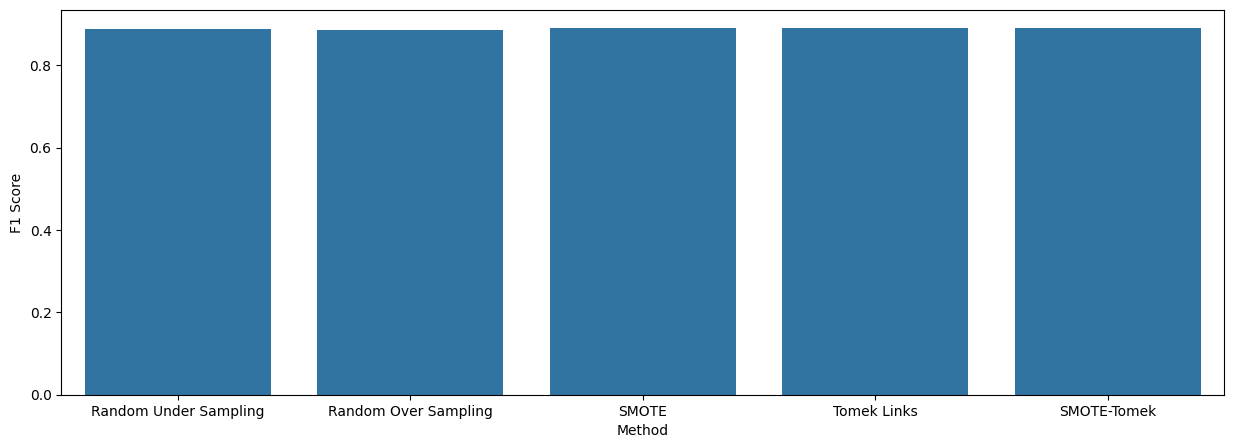

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(y=results_df['F1 Score'], x=results_df['Method'])

# Model Training and Evaluation with Naive Bayes

In [66]:
from sklearn.naive_bayes import MultinomialNB
# Define model
nb_model = MultinomialNB()

# Define hyperparameter grid
param_grid = {
    "classifier__alpha": [0.1, 0.3, 0.5, 0.7, 1.0]
}

# Create pipelineparam_dist
pipeline = ImbPipeline([
    ("resample", smote_tomek),
    ("classifier", nb_model)
])

In [ ]:
# Perform hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

X_train_dense = X_train_v.toarray()
X_test_dense = X_test_v.toarray()


grid_search.fit(X_train_dense, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resample',
                                        SMOTETomek(random_state=42)),
                                       ('classifier', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'classifier__alpha': [0.1, 0.3, 0.5, 0.7, 1.0]},
             scoring='f1')

# ⚡ Tip: Use TruncatedSVD for Dimensionality Reduction (optional)
If .toarray() makes your system run out of memory, apply:

In [ ]:
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=100)  # Adjust based on data
# X_train_reduced = svd.fit_transform(X_train)
# X_test_reduced = svd.transform(X_test)


# ✅ Fix: Convert Sparse Matrix to Dense
Right before calling .fit(), convert X_train_v to dense like this:

In [ ]:

# Evaluate on test set
y_pred = grid_search.best_estimator_.predict(X_test_dense)
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

print(f'confusion_matrix:- {confusion_matrix(y_test, y_pred)}')
print(f'accuracy_score:- {accuracy_score(y_test, y_pred)}')
print(f'f1_score:- {f1_score(y_test, y_pred)}')
print(f'precision_score:- {precision_score(y_test, y_pred)}')
print(f'recall_score:- {recall_score(y_test, y_pred)}')
print(f'roc_auc_score:- {roc_auc_score(y_test, y_pred)}')

Best Parameters: {'classifier__alpha': np.float64(0.9816326530612246)}
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       702
           1       0.89      0.89      0.89      1263

    accuracy                           0.86      1965
   macro avg       0.85      0.85      0.85      1965
weighted avg       0.86      0.86      0.86      1965

confusion_matrix:- [[ 564  138]
 [ 133 1130]]
accuracy_score:- 0.862086513994911
f1_score:- 0.8929276965626235
precision_score:- 0.8911671924290221
recall_score:- 0.894695170229612
roc_auc_score:- 0.8490569868242077


In [ ]:
# Define parameter distribution
param_dist = {
    "classifier__alpha": np.linspace(0.1, 1.0, 50)
}

# Pipeline
pipeline = ImbPipeline([
    ("resample", smote_tomek),
    ("classifier", nb_model)
])

# Randomized search
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,  # Try 20 different settings
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)

#  Fit model
random_search.fit(X_train_dense, y_train)

Best Parameters: {'classifier__alpha': np.float64(0.9816326530612246)}
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       702
           1       0.89      0.89      0.89      1263

    accuracy                           0.86      1965
   macro avg       0.85      0.85      0.85      1965
weighted avg       0.86      0.86      0.86      1965



In [ ]:
# Evaluate
y_pred = random_search.best_estimator_.predict(X_test_dense)
print("Best Parameters:", random_search.best_params_)
print(classification_report(y_test, y_pred))

Best Parameters: {'classifier__alpha': np.float64(0.9816326530612246)}
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       702
           1       0.89      0.89      0.89      1263

    accuracy                           0.86      1965
   macro avg       0.85      0.85      0.85      1965
weighted avg       0.86      0.86      0.86      1965



In [ ]:
print(f'confusion_matrix:- {confusion_matrix(y_test, y_pred)}')
print(f'accuracy_score:- {accuracy_score(y_test, y_pred)}')
print(f'f1_score:- {f1_score(y_test, y_pred)}')
print(f'precision_score:- {precision_score(y_test, y_pred)}')
print(f'recall_score:- {recall_score(y_test, y_pred)}')
print(f'roc_auc_score:- {roc_auc_score(y_test, y_pred)}')

confusion_matrix:- [[ 564  138]
 [ 133 1130]]
accuracy_score:- 0.862086513994911
f1_score:- 0.8929276965626235
precision_score:- 0.8911671924290221
recall_score:- 0.894695170229612
roc_auc_score:- 0.8490569868242077


In [51]:
def evaluate_model(X_train, y_train, X_test, y_test):
    # Train Logistic Regression
    model = MultinomialNB(alpha=1)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    return accuracy_score,precision, recall, f1, roc_auc

In [52]:
# Evaluate on Random Under Sampling
accuracy_score_under,precision_under, recall_under, f1_under, roc_auc_under = evaluate_model(X_train_under, y_train_under, X_test_v, y_test)

# Evaluate on Random Over Sampling
accuracy_score_over,precision_over, recall_over, f1_over, roc_auc_over = evaluate_model(X_train_over, y_train_over, X_test_v, y_test)

# Evaluate on SMOTE
accuracy_score_smote,precision_smote, recall_smote, f1_smote, roc_auc_smote = evaluate_model(X_resampled, y_resampled, X_test_v, y_test)

# Evaluate on Tomek Links
accuracy_score_tomek,precision_tomek, recall_tomek, f1_tomek, roc_auc_tomek = evaluate_model(X_train_tomek, y_train_tomek, X_test_v, y_test)

# Evaluate on SMOTE-Tomek
accuracy_score_smote_tomek,precision_smote_tomek, recall_smote_tomek, f1_smote_tomek, roc_auc_smote_tomek = evaluate_model(X_train_smote_tomek, y_train_smote_tomek, X_test_v, y_test)

# Store results
results = {
    "Method": ["Random Under Sampling", "Random Over Sampling", "SMOTE", "Tomek Links", "SMOTE-Tomek"],
    "Accuracy": [accuracy_score_under, accuracy_score_over, accuracy_score_smote, accuracy_score_tomek, accuracy_score_smote_tomek],
    "Precision": [precision_under, precision_over, precision_smote, precision_tomek, precision_smote_tomek],
    "Recall": [recall_under, recall_over, recall_smote, recall_tomek, recall_smote_tomek],
    "F1 Score": [f1_under, f1_over, f1_smote, f1_tomek, f1_smote_tomek],
    "ROC AUC": [roc_auc_under, roc_auc_over, roc_auc_smote, roc_auc_tomek, roc_auc_smote_tomek]
}

results_df = pd.DataFrame(results)
print(results_df)

                  Method                                     Accuracy  \
0  Random Under Sampling  <function accuracy_score at 0x7a2a5294b560>   
1   Random Over Sampling  <function accuracy_score at 0x7a2a5294b560>   
2                  SMOTE  <function accuracy_score at 0x7a2a5294b560>   
3            Tomek Links  <function accuracy_score at 0x7a2a5294b560>   
4            SMOTE-Tomek  <function accuracy_score at 0x7a2a5294b560>   

   Precision    Recall  F1 Score   ROC AUC  
0   0.904087  0.858274  0.880585  0.847228  
1   0.898042  0.871734  0.884693  0.846836  
2   0.891167  0.894695  0.892928  0.849057  
3   0.806116  0.980998  0.885000  0.778248  
4   0.891167  0.894695  0.892928  0.849057  


<Axes: xlabel='Method', ylabel='F1 Score'>

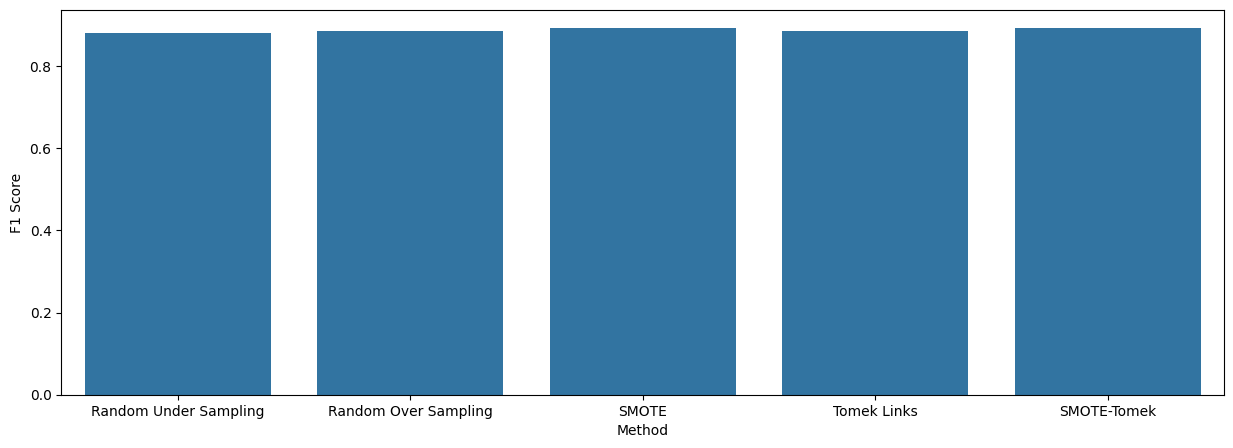

In [53]:
plt.figure(figsize=(15,5))
sns.barplot(y=results_df['F1 Score'], x=results_df['Method'])

# Model Training and Evaluation with SVM

In [54]:
from sklearn.preprocessing import StandardScaler

# Define pipeline
pipeline = ImbPipeline([
    ("resample", SMOTETomek(random_state=42)),
    #("scaler", StandardScaler()),  # SVM needs scaled input
    ("classifier", SVC())
])

# Define hyperparameters
param_grid = {
    "classifier__C": [0.1, 1, 10],
    "classifier__kernel": ["linear", "rbf"],
    "classifier__gamma": [0, 0.1]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)


# TF-IDF or CountVectorizer (text data)

⚠️ Sometimes	These features are already normalized to some extent, but scaling can still help with RBF kernel performance.

# ✅ TL;DR
If you're using SVM with linear kernel:
You can skip the scaler — TF-IDF already helps standardize features.

If you're using SVM with RBF, sigmoid, or poly kernels:
Scaling with StandardScaler is recommended, as these kernels are sensitive to feature ranges.


#🔍 What Happens Without Scaling?
Kernels like RBF compute distances — if one feature has a larger range, it can dominate the others.

TF-IDF features are often sparse and normalized, but not perfectly standardized (mean ≠ 0, std ≠ 1).


#✅ Safe Practice
If we're not sure, just add StandardScaler after converting TF-IDF to dense

In [ ]:
# from sklearn.preprocessing import StandardScaler

# X_train_dense = X_train_v.toarray()
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_dense)


In [55]:
 # 7. Fit
grid_search.fit(X_train_v, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resample',
                                        SMOTETomek(random_state=42)),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': [0, 0.1],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='f1')

In [65]:
# Evaluate
y_pred = grid_search.best_estimator_.predict(X_test_v)
print("✅ Best Parameters:", grid_search.best_params_)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

print(f'confusion_matrix:- {confusion_matrix(y_test, y_pred)}')
print(f'accuracy_score:- {accuracy_score(y_test, y_pred)}')
print(f'f1_score:- {f1_score(y_test, y_pred)}')
print(f'precision_score:- {precision_score(y_test, y_pred)}')
print(f'recall_score:- {recall_score(y_test, y_pred)}')
print(f'roc_auc_score:- {roc_auc_score(y_test, y_pred)}')

✅ Best Parameters: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       702
           1       0.88      0.91      0.90      1263

    accuracy                           0.87      1965
   macro avg       0.86      0.85      0.85      1965
weighted avg       0.87      0.87      0.87      1965

confusion_matrix:- [[ 548  154]
 [ 108 1155]]
accuracy_score:- 0.8666666666666667
f1_score:- 0.8981337480559876
precision_score:- 0.8823529411764706
recall_score:- 0.9144893111638955
roc_auc_score:- 0.847558045895338


In [62]:
def evaluate_model(X_train, y_train, X_test, y_test):
    # Train Logistic Regression

    #model = SVC(C=10,kernel='linear',gamma=0.1)
    model = SVC(C=1,kernel='rbf',gamma=0.1)
    # # Define pipeline
    # model = ImbPipeline([
    #     ("scaler", StandardScaler(with_mean=False)),  # SVM needs scaled input
    #     ("classifier", SVC(C=1,kernel='rbf',gamma=0.1))
    # ])

    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)


# Define hyperparameters
# param_grid = {
#     "classifier__C": [0.1, 1, 10],
#     "classifier__kernel": ["linear", "rbf"],
#     "classifier__gamma": [0, 0.1]
# }


    # Calculate evaluation metrics
    accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    return accuracy_score,precision, recall, f1, roc_auc

You're passing a sparse matrix (like from TfidfVectorizer) into StandardScaler().

But StandardScaler by default tries to center the data (i.e., subtract the mean), which doesn’t work with sparse matrices — because subtracting a non-zero mean would make many zero entries non-zero, destroying the sparsity.


If you're converting to dense anyway (e.g., before SMOTE or SVM), you can use the default StandardScaler():

This keeps the matrix sparse and only scales by standard deviation (no centering).

In [75]:
# scale = StandardScaler(with_mean=False)

# x_train_scale = scale.fit_transform(X_train_v)
# x_test_scale = scale.transform(X_test_v)

In [63]:
# Evaluate on Random Under Sampling
accuracy_score_under,precision_under, recall_under, f1_under, roc_auc_under = evaluate_model(X_train_under, y_train_under, X_test_v, y_test)

# Evaluate on Random Over Sampling
accuracy_score_over,precision_over, recall_over, f1_over, roc_auc_over = evaluate_model(X_train_over, y_train_over, X_test_v, y_test)

# Evaluate on SMOTE
accuracy_score_smote,precision_smote, recall_smote, f1_smote, roc_auc_smote = evaluate_model(X_resampled, y_resampled, X_test_v, y_test)

# Evaluate on Tomek Links
accuracy_score_tomek,precision_tomek, recall_tomek, f1_tomek, roc_auc_tomek = evaluate_model(X_train_tomek, y_train_tomek, X_test_v, y_test)

# Evaluate on SMOTE-Tomek
accuracy_score_smote_tomek,precision_smote_tomek, recall_smote_tomek, f1_smote_tomek, roc_auc_smote_tomek = evaluate_model(X_train_smote_tomek, y_train_smote_tomek, X_test_v, y_test)

# Store results
results = {
    "Method": ["Random Under Sampling", "Random Over Sampling", "SMOTE", "Tomek Links", "SMOTE-Tomek"],
    "Accuracy": [accuracy_score_under, accuracy_score_over, accuracy_score_smote, accuracy_score_tomek, accuracy_score_smote_tomek],
    "Precision": [precision_under, precision_over, precision_smote, precision_tomek, precision_smote_tomek],
    "Recall": [recall_under, recall_over, recall_smote, recall_tomek, recall_smote_tomek],
    "F1 Score": [f1_under, f1_over, f1_smote, f1_tomek, f1_smote_tomek],
    "ROC AUC": [roc_auc_under, roc_auc_over, roc_auc_smote, roc_auc_tomek, roc_auc_smote_tomek]
}

results_df = pd.DataFrame(results)
print(results_df)

                  Method                                     Accuracy  \
0  Random Under Sampling  <function accuracy_score at 0x7a2a5294b560>   
1   Random Over Sampling  <function accuracy_score at 0x7a2a5294b560>   
2                  SMOTE  <function accuracy_score at 0x7a2a5294b560>   
3            Tomek Links  <function accuracy_score at 0x7a2a5294b560>   
4            SMOTE-Tomek  <function accuracy_score at 0x7a2a5294b560>   

   Precision    Recall  F1 Score   ROC AUC  
0   0.916808  0.855107  0.884883  0.857753  
1   0.911570  0.873317  0.892034  0.860448  
2   0.884557  0.916073  0.900039  0.850487  
3   0.860432  0.946952  0.901621  0.835299  
4   0.882353  0.914489  0.898134  0.847558  


<Axes: xlabel='Method', ylabel='F1 Score'>

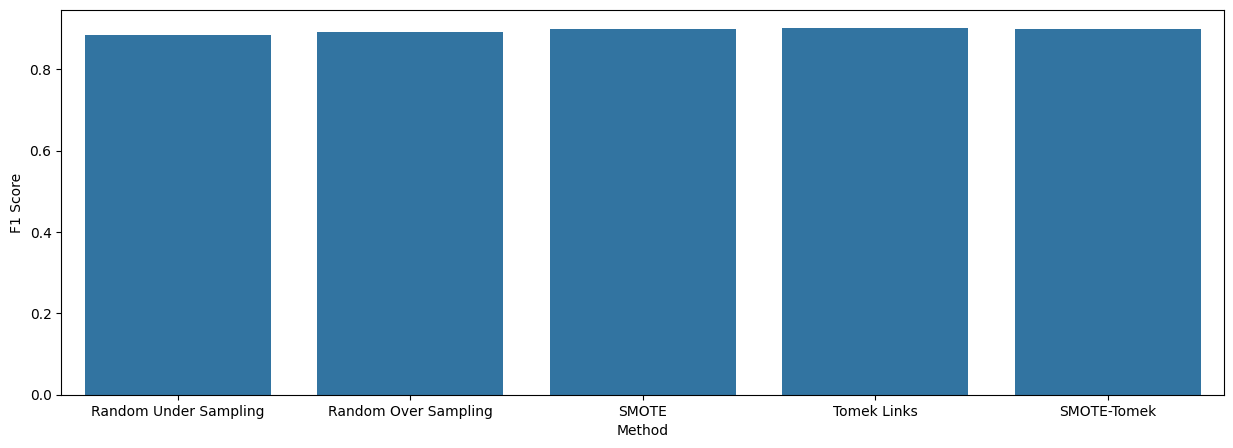

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(y=results_df['F1 Score'], x=results_df['Method'])

🧠 n_jobs in GridSearchCV or RandomizedSearchCV:
It controls how many CPU cores are used to run the search in parallel.

1. 1	Run on a single core (default) ❌ slow
2. -1	Use all available cores ✅ fast
3. 2, 4, etc.	Use that many cores

GridSearchCV(estimator=svm, param_grid=params, cv=5, n_jobs=-1)

⚠️ Warning:
If you're on a shared environment (like Google Colab or a limited server), using n_jobs=-1 might overwhelm the system. Use with care.

# Final Model Building:-

In [84]:
model = SVC(C=1,kernel='rbf',gamma=0.1,probability=True)

In [76]:
# Evaluate on Tomek Links
model.fit(X_train_tomek, y_train_tomek)
# Predict on the test set
y_pred = model.predict(X_test_v)

In [77]:
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

print(f'\n Confusion Matrix:- {confusion_matrix(y_test, y_pred)}')
print(f'\n Accuracy Score:- {accuracy_score(y_test, y_pred)}')
print(f'\n F1 Score:- {f1_score(y_test, y_pred)}')
print(f'\n Precision Score:- {precision_score(y_test, y_pred)}')
print(f'\n Recall Score:- {recall_score(y_test, y_pred)}')
print(f'\n Roc Auc Score:- {roc_auc_score(y_test, y_pred)}')

print(f'\nTraining Score:-{model.score(X_train_tomek,y_train_tomek)}')
print(f'\nTesting Score:- {model.score(X_test_v,y_test)}')


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.80       702
           1       0.86      0.95      0.90      1263

    accuracy                           0.87      1965
   macro avg       0.87      0.84      0.85      1965
weighted avg       0.87      0.87      0.86      1965


 Confusion Matrix:- [[ 508  194]
 [  67 1196]]

 Accuracy Score:- 0.867175572519084

 F1 Score:- 0.9016208066339992

 Precision Score:- 0.860431654676259

 Recall Score:- 0.9469517022961204

 Roc Auc Score:- 0.835299212971422

Training Score:-0.8960522942835171

Testing Score:- 0.867175572519084


In [87]:
# Evaluate on SMOTE-Tomek
model.fit(X_train_smote_tomek, y_train_smote_tomek)
# Predict on the test set
y_pred = model.predict(X_test_v)

In [88]:
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

print(f'\n Confusion Matrix:- {confusion_matrix(y_test, y_pred)}')
print(f'\n Accuracy Score:- {accuracy_score(y_test, y_pred)}')
print(f'\n F1 Score:- {f1_score(y_test, y_pred)}')
print(f'\n Precision Score:- {precision_score(y_test, y_pred)}')
print(f'\n Recall Score:- {recall_score(y_test, y_pred)}')
print(f'\n Roc Auc Score:- {roc_auc_score(y_test, y_pred)}')

print(f'\nTraining Score:-{model.score(X_train_smote_tomek,y_train_smote_tomek)}')
print(f'\nTesting Score:- {model.score(X_test_v,y_test)}')


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       702
           1       0.88      0.91      0.90      1263

    accuracy                           0.87      1965
   macro avg       0.86      0.85      0.85      1965
weighted avg       0.87      0.87      0.87      1965


 Confusion Matrix:- [[ 548  154]
 [ 108 1155]]

 Accuracy Score:- 0.8666666666666667

 F1 Score:- 0.8981337480559876

 Precision Score:- 0.8823529411764706

 Recall Score:- 0.9144893111638955

 Roc Auc Score:- 0.847558045895338

Training Score:-0.9164348171701113

Testing Score:- 0.8666666666666667


In [214]:
new_df.head()

,Review,Rating,New_Review,new_Rating,polarity,target,text_length
0,"The ambience was good, food was quite good . h...",5.0,ambienc good food quit good saturday lunch cos...,1,0.660000,1,24
1,Ambience is too good for a pleasant evening. S...,5.0,ambienc good pleasant even servic prompt food ...,1,0.606667,1,14
2,A must try.. great food great ambience. Thnx f...,5.0,must tri great food great ambienc thnx servic ...,1,0.540000,1,19
3,Soumen das and Arun was a great guy. Only beca...,5.0,soumen da arun great guy behavior sincereti go...,1,0.500000,1,14
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,food goodw order kodi drumstick basket mutton ...,1,0.577500,1,17


In [206]:
from statsmodels.stats.proportion import proportions_ztest

# Let's say:
# model predicted correctly 85 out of 100 test samples
correct_predictions = 154 + 548
n_total = 154 + 548 + 108 + 1155

# H₀: Accuracy = 0.5 (random guess)
# H₁: Accuracy > 0.5
stat, pval = proportions_ztest(count=correct_predictions, nobs=n_total, value=0.5, alternative='larger')

print(f"Z-statistic: {stat:.3f}")
print(f"p-value: {pval:.5f}")

if pval < 0.05:
    print("✅ Reject null: Model is significantly better than random.")
else:
    print("❌ Fail to reject null: No significant evidence model is better than random.")


Z-statistic: -13.205
p-value: 1.00000
❌ Fail to reject null: No significant evidence model is better than random.


In [212]:
from scipy.stats import ttest_ind, chi2_contingency

In [215]:
# Hypothesis test: Are positive reviews longer than negative ones?
new_df['text_length'] = new_df['New_Review'].apply(lambda x: len(x.split()))
positive_len = new_df[new_df['new_Rating'] == 1]['text_length']
negative_len = new_df[new_df['new_Rating'] == 0]['text_length']
t_stat, p_value = ttest_ind(positive_len, negative_len)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference in review lengths between sentiments.")
else:
    print("No significant difference.")

# Reject for original Dataset

T-statistic: -2.527, P-value: 0.0115
Significant difference in review lengths between sentiments.


<ipython-input-215-654c8a90e6e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text_length'] = new_df['Review'].apply(lambda x: len(x.split()))


In [218]:
# Hypothesis test: Are positive reviews longer than negative ones?
new_df['text_length'] = new_df['New_Review'].apply(lambda x: len(x.split()))
positive_len = new_df[new_df['target'] == 1]['text_length']
negative_len = new_df[new_df['target'] == 0]['text_length']
t_stat, p_value = ttest_ind(positive_len, negative_len)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Reject null: Models perform significantly differently.")
else:
    print("❌ Fail to reject null: No significant difference between models.")

# Reject for original Dataset

T-statistic: -18.738, P-value: 0.0000
✅ Reject null: Models perform significantly differently.


<ipython-input-218-4d82b9a8e9a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text_length'] = new_df['New_Review'].apply(lambda x: len(x.split()))


In [ ]:
# Hypothesis test: Are positive reviews longer than negative ones?
new_df['text_length'] = new_df['New_Review'].apply(lambda x: len(x.split()))
positive_len = new_df[new_df['new_Rating'] == 1]['text_length']
negative_len = new_df[new_df['new_Rating'] == 0]['text_length']
t_stat, p_value = ttest_ind(positive_len, negative_len)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference in review lengths between sentiments.")
else:
    print("No significant difference.")

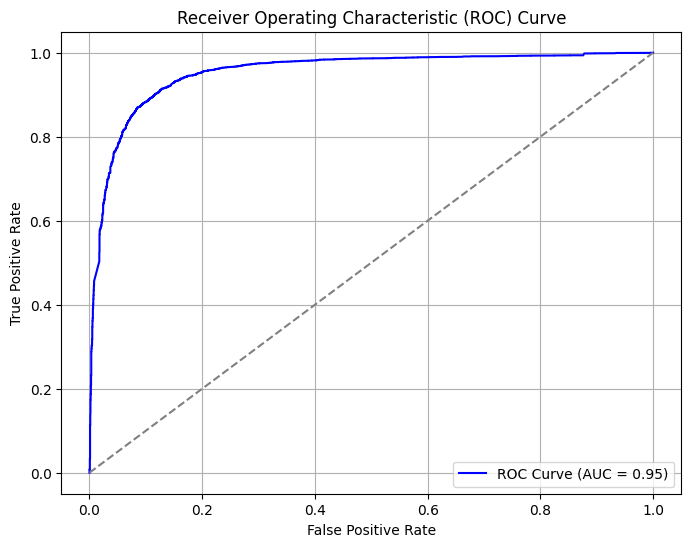

In [89]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities (for ROC/AUC)
y_probs = model.predict_proba(X_train_v)[:, 1]  # Probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

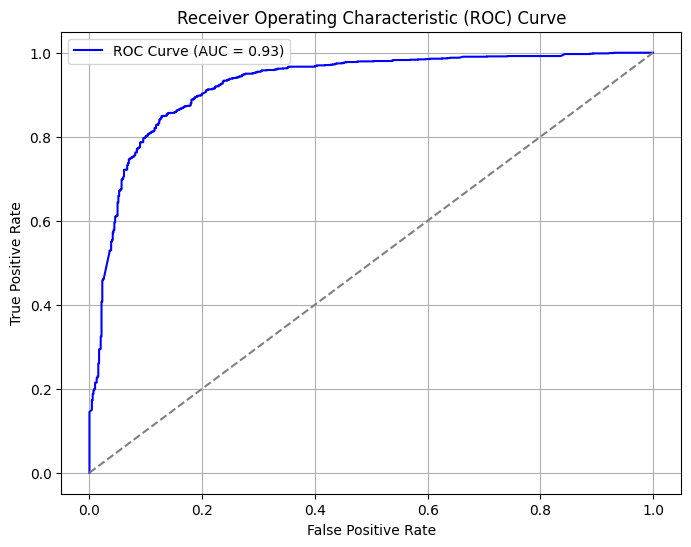

In [90]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities (for ROC/AUC)
y_probs = model.predict_proba(X_test_v)[:, 1]  # Probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

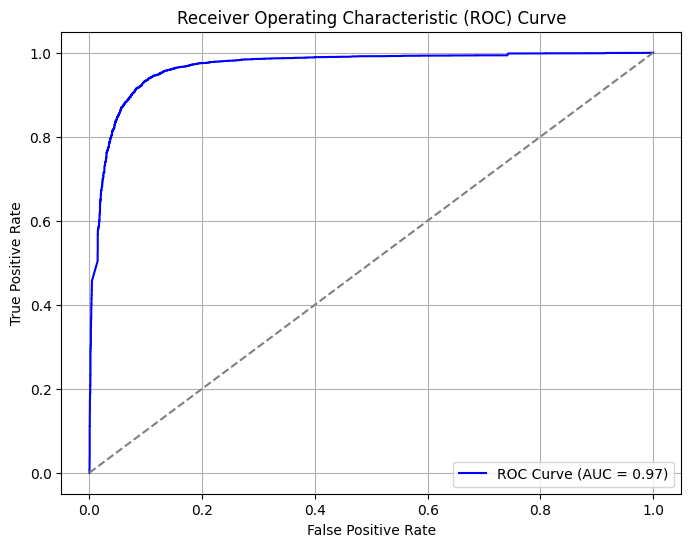

In [91]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities (for ROC/AUC)
y_probs = model.predict_proba(X_train_smote_tomek)[:, 1]  # Probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_smote_tomek, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [92]:
# Model Deployment using Flask:-
import pickle

In [93]:
with open('vectorizer.pkl', 'wb') as model_file:
    pickle.dump(vectorizer, model_file)

In [94]:
import pickle

# ✅ Save vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# ✅ Save SMOTE-Tomek resampler
with open('smote_tomek.pkl', 'wb') as file:
    pickle.dump(smote_tomek, file)  # Replace with your actual SMOTETomek object

# ✅ Save trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [95]:
import pickle

# ✅ 1. Load the vectorizer
with open('vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

# ✅ 2. Load the trained model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# ⛔️ SMOTE-Tomek is only used during training → you don't need it for prediction.

# ✅ 3. Prepare new test samples
new_texts = [
    "I love this app, it's amazing!",
    "Terrible experience, I want a refund."
]

# ✅ 4. Transform the new texts using the same vectorizer
X_new = vectorizer.transform(new_texts)

# ✅ 5. Convert to dense if model needs it (e.g. SVM, LogisticRegression)
X_new_dense = X_new.toarray()

# ✅ 6. Predict
preds = model.predict(X_new_dense)

# (Optional) Get prediction probabilities (if model supports it)
# probs = model.predict_proba(X_new_dense)[:, 1]

# ✅ 7. Output
for text, label in zip(new_texts, preds):
    print(f"Text: {text}\nPrediction: {label}\n")


Text: I love this app, it's amazing!
Prediction: 1

Text: Terrible experience, I want a refund.
Prediction: 0



In [172]:
text = ['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.']
# ✅ 4. Transform the new texts using the same vectorizer
X_new = vectorizer.transform(text)

# ✅ 5. Convert to dense if model needs it (e.g. SVM, LogisticRegression)
X_new_dense = X_new.toarray()

# ✅ 6. Predict
preds = model.predict(X_new_dense)

# (Optional) Get prediction probabilities (if model supports it)
# probs = model.predict_proba(X_new_dense)[:, 1]

# ✅ 7. Output
for text, label in zip(text, preds):
    print(f"Text: {text}\nPrediction: {label}\n")

Text: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Prediction: 0



In [ ]:
#This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.
# I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

In [169]:
X_test['New_Review'][8912]  # 8839,1507(0->1),9519,8110,5900,3671,6554,454,1046,8912

'unprofession unhygien shawarma fast food shop sprang everi nook corner citi typic setup road hygien never consid order rumali roti shawarma bread half cook avoid place futur'

In [147]:
y_test

,new_Rating
8839,0
1507,0
9519,1
8110,0
5900,0
...,...
3671,1
6554,1
454,1
1046,0


In [142]:
# categories for each good review in postive and bad in negative

In [144]:
new_df[new_df['new_Rating']==1]['Review'][7]   # 0,1,2,3,4,5,6,7,8,9,9992,9993,9996,9998,9999

'Well after reading so many reviews finally visited this place...ambience was so good and coming to food crispy corn is nice. Tawa fish was ok... Basket Biryani disappointed us... biryani was ok but not flattering as they claimed.. Staff was polite and prompt especially pradeep and Suman.'

In [130]:
new_df[new_df['new_Rating']==0]['Review'][9997] # 14,30,45,56,66,9978(1),9988,9994(1),9995(1),9997

'Bad rating is mainly because of "Chicken Bone found in Veg food" and is not acceptable for a Vegetarian.\n\nTo satiate Cravings for chinese food we headed to Chinese Pavilion and there was also a voucher available in Little app for Luncheon tray for Rs 310 (Veg) [well do not bother for the voucher as the price for Veg Luncheon tray is Rs 275/- + taxes in the restaurant itself).\n\nThe ambiance is decent and since it was noon, not many tables occupied so it was pretty quite.\n\nIt was Thrusday special (Veg):\nHot and Sour soup: was just OK - well it had sprouts which were crunchy in your mouth: something different.\nKimchi - salad (personally i\'m never fond of it)\nPotato in plum sauce - this was very good and well made\nBrocolli, Baby corn, Mushroom in spicy sauce - this dish lived to its name \'too spicy\'; but was fine with fried rice\nVeg hakka noodles - was good\nVeg fried rice\n\nOverall the food tasted good until a piece of chicken BONE came into my friend\'s (he is pure vegeta

# Acutual vs Predication Percentage:-

In [187]:
y_pred[y_pred==0].shape , y_pred[y_pred==1].shape

((656,), (1309,))

In [181]:
y_pred.shape,y_test.shape

((1965,), (1965, 1))

In [190]:
y_test[y_test['new_Rating']==0].shape , y_test[y_test['new_Rating']==1].shape

((702, 1), (1263, 1))

In [200]:
# Actual Percentage for True
actual_true= y_test[y_test['new_Rating']==1].shape[0] / y_test.shape[0] * 100
actual_true

64.27480916030535

In [199]:
# Actual Percentage for false
actual_false=y_test[y_test['new_Rating']==0].shape[0] / y_test.shape[0] * 100
actual_false

35.725190839694655

In [198]:
# Prediction Percentage for True
pred_true = y_pred[y_pred==1].shape[0] / y_pred.shape[0] * 100
pred_true

66.61577608142494

In [197]:
# Prediction Percentage for False
pred_false =y_pred[y_pred==0].shape[0] / y_pred.shape[0] * 100
pred_false

33.38422391857506

In [204]:
pred_true/actual_true * 100 , actual_true/pred_true * 100

(103.64212193190814, 96.48586707410237)

In [205]:
pred_false/actual_false * 100 , actual_false/pred_false * 100

(93.44729344729345, 107.01219512195124)

In [188]:
y_test

,new_Rating
8839,0
1507,0
9519,1
8110,0
5900,0
...,...
3671,1
6554,1
454,1
1046,0


In [270]:
from imblearn.pipeline import Pipeline as ImbPipeline  # imblearn pipeline
# Naive bayies:-
# Evaluate on SMOTE
pipeline = ImbPipeline([
    ('vectorizer', TfidfVectorizer(max_features=10000, stop_words='english',ngram_range=(1,2))),
    ('resample', SMOTETomek()),
    ('classifier', MultinomialNB(alpha=1))
])

In [250]:
# X_train_dense = X_train_v.toarray()
# X_test_dense = X_test_v.toarray()

In [271]:
pipeline.fit(X_train['New_Review'], y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('resample', SMOTETomek()),
                ('classifier', MultinomialNB(alpha=1))])

In [272]:
y_pred = pipeline.predict(X_test['New_Review'])

In [252]:
y_pred.shape

(1965,)

In [244]:
y_test.shape

(1965, 1)

In [247]:
# y_test['new_Rating']

In [253]:
print("Before resampling:", X_train.shape, len(y_train))


Before resampling: (7856, 1) 7856


In [234]:
y_train = y_train['new_Rating'].reset_index(drop=True)


In [238]:
y_test1 = y_train.reset_index(drop=True)

In [273]:
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

print(f'\n Confusion Matrix:- {confusion_matrix(y_test, y_pred)}')
print(f'\n Accuracy Score:- {accuracy_score(y_test, y_pred)}')
print(f'\n F1 Score:- {f1_score(y_test, y_pred)}')
print(f'\n Precision Score:- {precision_score(y_test, y_pred)}')
print(f'\n Recall Score:- {recall_score(y_test, y_pred)}')
print(f'\n Roc Auc Score:- {roc_auc_score(y_test, y_pred)}')

print(f'\nTraining Score:-{model.score(X_train_smote_tomek,y_train_smote_tomek)}')
print(f'\nTesting Score:- {model.score(X_test_v,y_test)}')



📊 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       702
           1       0.89      0.88      0.89      1263

    accuracy                           0.85      1965
   macro avg       0.84      0.84      0.84      1965
weighted avg       0.86      0.85      0.86      1965


 Confusion Matrix:- [[ 568  134]
 [ 151 1112]]

 Accuracy Score:- 0.8549618320610687

 F1 Score:- 0.886408927859705

 Precision Score:- 0.8924558587479936

 Recall Score:- 0.880443388756928

 Roc Auc Score:- 0.8447800989368686

Training Score:-0.9164348171701113

Testing Score:- 0.8666666666666667


In [258]:
# Evaluate on Evaluate on Tomek Links
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=10000, stop_words='english',ngram_range=(1,2))),
    ('resample', TomekLinks()),
    ('classifier', MultinomialNB(alpha=1))
])

In [260]:
pipeline.fit(X_train['New_Review'], y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('resample', TomekLinks()),
                ('classifier', MultinomialNB(alpha=1))])

In [261]:
y_pred = pipeline.predict(X_test['New_Review'])

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

print(f'\n Confusion Matrix:- {confusion_matrix(y_test, y_pred)}')
print(f'\n Accuracy Score:- {accuracy_score(y_test, y_pred)}')
print(f'\n F1 Score:- {f1_score(y_test, y_pred)}')
print(f'\n Precision Score:- {precision_score(y_test, y_pred)}')
print(f'\n Recall Score:- {recall_score(y_test, y_pred)}')
print(f'\n Roc Auc Score:- {roc_auc_score(y_test, y_pred)}')

print(f'\nTraining Score:-{model.score(X_train_smote_tomek,y_train_smote_tomek)}')
print(f'\nTesting Score:- {model.score(X_test_v,y_test)}')


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.67      0.77       702
           1       0.84      0.97      0.90      1263

    accuracy                           0.86      1965
   macro avg       0.88      0.82      0.84      1965
weighted avg       0.87      0.86      0.85      1965


 Confusion Matrix:- [[ 469  233]
 [  42 1221]]

 Accuracy Score:- 0.8600508905852418

 F1 Score:- 0.8987854251012146

 Precision Score:- 0.8397524071526823

 Recall Score:- 0.9667458432304038

 Roc Auc Score:- 0.8174185056607859

Training Score:-0.9164348171701113

Testing Score:- 0.8666666666666667


In [212]:
# Evaluate on SMOTE
accuracy_score_smote,precision_smote, recall_smote, f1_smote, roc_auc_smote = evaluate_model(X_resampled, y_resampled, X_test_v, y_test)

# Evaluate on Tomek Links
accuracy_score_tomek,precision_tomek, recall_tomek, f1_tomek, roc_auc_tomek = evaluate_model(X_train_tomek, y_train_tomek, X_test_v, y_test)

# Evaluate on SMOTE-Tomek
accuracy_score_smote_tomek,precision_smote_tomek, recall_smote_tomek, f1_smote_tomek, roc_auc_smote_tomek = evaluate_model(X_train_smote_tomek, y_train_smote_tomek, X_test_v, y_test)

In [264]:
with open('full_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [269]:
import pickle

# ✅ Load the pipeline


with open('full_pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)

# ✅ Predict on new text data
new_texts = [
    "This is the best product ever!",
    "Absolutely terrible. I hate it."
]

# Predict
preds = pipeline.predict(new_texts)

# Output
for text, label in zip(new_texts, preds):
    print(f"Text: {text}\nPrediction: {label}\n")


Text: This is the best product ever!
Prediction: 1

Text: Absolutely terrible. I hate it.
Prediction: 0



In [277]:
# ⚠️ WARNING:
# SMOTETomek should not be applied during prediction — it's meant only for **training**
# So ideally, you should not include it inside the pipeline when saving for inference
# It will throw an error like "fit_resample" not valid for 1 sample

# ✅ BEST PRACTICE:
# 👉 Create two pipelines:
# 1. **Training pipeline**: includes SMOTETomek
# 2. **Prediction pipeline**: excludes SMOTETomek

# For testing (inference), rebuild pipeline like this (without SMOTETomek):

# Extract the fitted vectorizer and classifier from train pipeline
vectorizer = pipeline.named_steps['vectorizer']
classifier = pipeline.named_steps['classifier']

# Build prediction pipeline
predict_pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

# Train and save this one AFTER resampling training data
# Then load it for test-time prediction:

with open('predict_pipeline.pkl', 'wb') as file:
    pipeline = pickle.dump(predict_pipeline,file)

with open('predict_pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)


In [275]:
# ✅ Predict on new text data
new_texts = [
    "This is the best product ever!",
    "Absolutely terrible. I hate it."
]

# Predict
preds = pipeline.predict(new_texts)

# Output
for text, label in zip(new_texts, preds):
    print(f"Text: {text}\nPrediction: {label}\n")

Text: This is the best product ever!
Prediction: 1

Text: Absolutely terrible. I hate it.
Prediction: 0



In [276]:
with open('predict_pipeline.pkl', 'rb') as f:
  predict_pipeline = pickle.load(f)

# Predict
sample_texts = ["This dog food is amazing!", "Worst product ever"]
preds = predict_pipeline.predict(sample_texts)

for text, pred in zip(sample_texts, preds):
    print(f"Text: {text} ➤ Prediction: {pred}")

Text: This dog food is amazing! ➤ Prediction: 1
Text: Worst product ever ➤ Prediction: 0
